In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("AB_NYC_proper.csv")

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,proper_neighbourhoof_grp,Proper_trim_neighbourhood_grp,neighbourhood,Trim_neighbourhood,Proper_trim_neighbourhood,...,new_minimum_nights,Outlier_or_not2,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_366,Unnamed: 25,Unnamed: 26
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Brooklyn,Brooklyn,Kensington,Kensington,Kensington,...,1.0,ok,9.0,19-10-2018,0.21,6.0,365.0,ok,799.0,45.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Manhattan,Manhattan,Midtown,Midtown,Midtown,...,1.0,ok,45.0,21-05-2019,0.38,2.0,355.0,ok,NaN,NaN
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Manhattan,Manhattan,Harlem,Harlem,Harlem,...,3.0,ok,0.0,NaN,0.00,1.0,365.0,ok,NaN,NaN
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Brooklyn,Brooklyn,Clinton Hill,Clinton Hill,Clinton Hill,...,1.0,ok,270.0,05-07-2019,4.64,1.0,194.0,ok,NaN,NaN
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,Manhattan,Manhattan,East Harlem,East Harlem,East Harlem,...,10.0,ok,9.0,19-11-2018,0.10,1.0,0.0,ok,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48896 entries, 0 to 48895
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  float64
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  float64
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   proper_neighbourhoof_grp        48895 non-null  object 
 6   Proper_trim_neighbourhood_grp   48895 non-null  object 
 7   neighbourhood                   48895 non-null  object 
 8   Trim_neighbourhood              48895 non-null  object 
 9   Proper_trim_neighbourhood       48895 non-null  object 
 10  latitude                        48895 non-null  float64
 11  longitude                       48895 non-null  float64
 12  room_type                       

In [9]:
df.drop(['Unnamed: 25', 'Unnamed: 26'], axis=1, inplace=True) #deleting unneccessary columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48896 entries, 0 to 48895
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  float64
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  float64
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   proper_neighbourhoof_grp        48895 non-null  object 
 6   Proper_trim_neighbourhood_grp   48895 non-null  object 
 7   neighbourhood                   48895 non-null  object 
 8   Trim_neighbourhood              48895 non-null  object 
 9   Proper_trim_neighbourhood       48895 non-null  object 
 10  latitude                        48895 non-null  float64
 11  longitude                       48895 non-null  float64
 12  room_type                       

In [13]:
df.isnull().sum()

id                                    1
name                                  1
host_id                               1
host_name                             1
neighbourhood_group                   1
proper_neighbourhoof_grp              1
Proper_trim_neighbourhood_grp         1
neighbourhood                         1
Trim_neighbourhood                    1
Proper_trim_neighbourhood             1
latitude                              1
longitude                             1
room_type                             1
 price                                1
 new_price                            1
 Outlier_or_not                       0
minimum_nights                        1
new_minimum_nights                    1
Outlier_or_not2                       0
number_of_reviews                     1
last_review                       10053
reviews_per_month                     1
calculated_host_listings_count        1
availability_365                      1
availability_366                      1


In [15]:
df.columns = df.columns.str.strip()  # to trim white spaces before few columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48896 entries, 0 to 48895
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  float64
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  float64
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   proper_neighbourhoof_grp        48895 non-null  object 
 6   Proper_trim_neighbourhood_grp   48895 non-null  object 
 7   neighbourhood                   48895 non-null  object 
 8   Trim_neighbourhood              48895 non-null  object 
 9   Proper_trim_neighbourhood       48895 non-null  object 
 10  latitude                        48895 non-null  float64
 11  longitude                       48895 non-null  float64
 12  room_type                       

In [19]:
df['price'].dtype

dtype('float64')

In [21]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")

In [23]:
df['price'].dtype

dtype('float64')

## Exploratory Data Analysis (EDA) Price Analysis:

### Price Analysis:

#### Average price by borough (Manhattan, Brooklyn, etc.)

In [28]:
average_price_by_borough = df.groupby('Proper_trim_neighbourhood_grp')['new_price'].mean().sort_values(ascending = False)

In [30]:
print(average_price_by_borough)

Proper_trim_neighbourhood_grp
Manhattan        182.952634
Brooklyn         119.369280
Staten Island    101.798928
Queens            96.095305
Bronx             85.752521
Name: new_price, dtype: float64


"Manhattan has the priciest rooms available."

#### Which neighborhoods have the highest & lowest prices?

In [34]:
average_price_by_neighbourhood = df.groupby("Proper_trim_neighbourhood")['new_price'].mean().sort_values(ascending = False)

In [36]:
highest_price = average_price_by_neighbourhood.head(10)
print(highest_price)

Proper_trim_neighbourhood
Fort Wadsworth       799.000000
Woodrow              700.000000
Tribeca              355.367232
Sea Gate             316.142857
Flatiron District    298.725000
Prince'S Bay         296.750000
Riverdale            287.363636
Noho                 282.948718
Neponsit             274.666667
Midtown              270.519741
Name: new_price, dtype: float64


In [38]:
lowest_price = average_price_by_neighbourhood.tail(10)
print(lowest_price)

Proper_trim_neighbourhood
Mount Eden        58.500000
Concord           58.192308
Grant City        57.666667
New Dorp Beach    57.400000
Bronxdale         57.105263
New Dorp          57.000000
Soundview         53.466667
Tremont           51.545455
Hunts Point       50.500000
Bull'S Head       47.333333
Name: new_price, dtype: float64


"here we get know that by neighbourhood top 10 areas which has priciest room available are: Fort Wadsworth, Woodrow, Tribeca, Sea Gate, Flatiron District, Prince'S Bay, Riverdale, Noho, Neponsit, Midtown"
"and top 10 areas which has cheapest room available are: Mount Eden, Concord, Grant City, New Dorp Beach, Bronxdale, Grant City, New Dorp, Soundview, Tremont ,Hunts Point Bull's Head"
 47.3333330.519741"

#### Are there overpriced listings compared to the market?

In [43]:
df.describe()

,id,host_id,latitude,longitude,price,new_price,minimum_nights,new_minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,143.956233,7.029962,6.116760,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,121.935067,20.510550,9.244957,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,69.000000,1.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,106.000000,3.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,175.000000,5.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,799.000000,1250.000000,45.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
# to calculate the outlier
q1 = 69
q3 = 175
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR    # formula to get upper bound 
print(IQR)
print(upper_bound)

106
334.0


In [47]:
overpriced_listings_count = df[df["new_price"] > upper_bound].shape[0]  # using shape[0] to get one dimentinal data only, without it it proved a lot unnecessary information
print("Number of overpriced listings:", overpriced_listings_count)

Number of overpriced listings: 2972


### Availability & Demand:

#### Which borough has the highest/lowest Airbnb listings?

In [51]:
listing_by_borough = df['Proper_trim_neighbourhood_grp'].value_counts()
print(listing_by_borough)

Proper_trim_neighbourhood_grp
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


" Manhattan has the most number of Airbnb listing whereas Staten Island has the least number of Airbnb listing"

#### How does availability change across months? (Seasonality)

In [55]:
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce") # Coneverting last review from object to date time

C:\Users\PRACHI\AppData\Local\Temp\ipykernel_29728\2878801274.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce") # Coneverting last review from object to date time


In [57]:
df["review_month"] = df["last_review"].dt.month  # to extract the month form last review

In [59]:
seasonality = df["review_month"].value_counts().sort_index()    # to count review per month 
print(seasonality)

review_month
1.0      2773
2.0       770
3.0      1288
4.0      2109
5.0      4701
6.0     13589
7.0      5937
8.0      1667
9.0      1535
10.0     1546
11.0     1158
12.0     1770
Name: count, dtype: int64


As we can see that on 6th month(june) most hotels/rooms are available.

#### Are there listings that are always available or never booked?

In [63]:
Always_available = df[df['availability_365'] == 365].shape[0]

In [65]:
Never_available = df[df["availability_365"] == 0].shape[0]

In [67]:
print("Always Available Listings:", Always_available)
print("Never Available Listings:", Never_available)

Always Available Listings: 1295
Never Available Listings: 17533


### Host & Property Insights:

#### Who are the top hosts with the most listings?

In [71]:
listing_by_host = df['host_id'].value_counts().head(10)
print(listing_by_host)

host_id
219517861.0    327
107434423.0    232
30283594.0     121
137358866.0    103
16098958.0      96
12243051.0      96
61391963.0      91
22541573.0      87
200380610.0     65
7503643.0       52
Name: count, dtype: int64


these are the top 10 host id with most listing

#### What property types dominate the market? (Private Room vs. Entire Home)

In [85]:
Property_type = df.groupby("room_type")["new_price"].sum().sort_values(ascending = False)
print(Property_type)

room_type
Entire home/apt    5039282.0
Private room       1919967.0
Shared room          79491.0
Name: new_price, dtype: float64


As we can clearly see that Entire home/apt making more revenue hence more dominant market value

In [88]:
Property_type1 = df.groupby("room_type")["room_type"].value_counts().sort_values(ascending = False)
print(Property_type)

room_type
Entire home/apt    5039282.0
Private room       1919967.0
Shared room          79491.0
Name: new_price, dtype: float64


As we can see that entire home/apt has more listing as well hence genrating more revenue as well

In [101]:
Property_type = Property_type.to_frame()   # to change property_type from series to data frame

AttributeError: 'DataFrame' object has no attribute 'to_frame'

<Axes: xlabel='room_type', ylabel='new_price'>

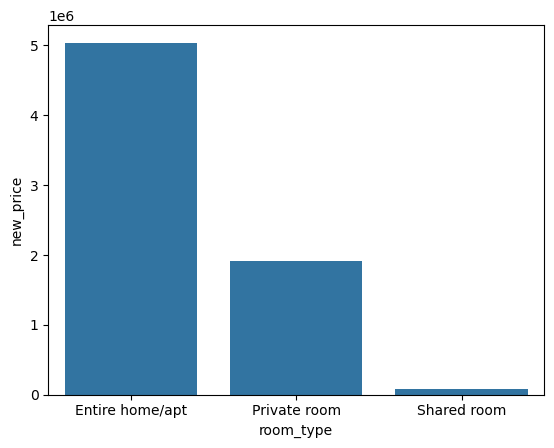

In [103]:
sns.barplot(x = 'room_type', y = 'new_price', data = Property_type)

#### Are there hosts with fake or repetitive listings?

In [106]:
top_hosts = df.groupby("host_id")["id"].count().sort_values(ascending=False).head(10)
print(top_hosts)

host_id
219517861.0    327
107434423.0    232
30283594.0     121
137358866.0    103
16098958.0      96
12243051.0      96
61391963.0      91
22541573.0      87
200380610.0     65
1475015.0       52
Name: id, dtype: int64


In [108]:
duplicate_listings = df[df.duplicated(subset=["name"], keep=False)]
print(duplicate_listings)

               id                                               name  \
73        17693.0                    HARLEM, NEW YORK WELCOMES YOU!!   
123       27883.0                             East Village Sanctuary   
171       44096.0                                   Room with a View   
267       64015.0                       Prime East Village 1 Bedroom   
321       77765.0                               Superior @ Box House   
...           ...                                                ...   
48684  36382847.0                                       Comfort home   
48735  36412461.0  Sunny, Cozy, Private Room In The Heart of Bush...   
48759  36420404.0                                    Home Sweet Home   
48791  36427922.0                                Home away from home   
48826  36449743.0                                  Brooklyn's finest   

           host_id            host_name neighbourhood_group  \
73         68428.0      Tye And Etienne           Manhattan   
123      

In [110]:
duplicate_coordinates = df[df.duplicated(subset=["latitude", "longitude"], keep=False)]
print(duplicate_coordinates)

               id                                               name  \
2311    1117706.0     Bright, Bohemian, Spacious Apt in Williamsburg   
2575    1336223.0    Safe, Sunny, Quiet Chelsea Apt has Washer/Dryer   
3615    2163602.0                Upper West Side elegance. Riverside   
7794    5918053.0             1 Quiet Private Room in Heart of Soho!   
8494    6539114.0                   Private Room in Williamsburg Apt   
9391    7202170.0                      Midtown East penthouse studio   
9561    7341406.0                Private Spacious Room with bathroom   
10947   8444227.0                      Private Room in Heart of Soho   
11314   8783567.0                  Studio Apt on The Upper West Side   
11913   9277608.0  Soho 3BR/2BA Everything is just outside your d...   
12251   9484892.0                 Cozy, E.Vill room w/ private bath!   
12313   9513278.0                      Sunny and chic SoHo apartment   
14246  11037023.0                BR in amazing Apt - 10min Manha

by looking at these data gave us the insight that there are host with fake or duplicate listing as well, Casue one host can't have more that 100 histing that just doesn't seems natural.

### Review & Rating Analysis:

#### Relationship between price and reviews (Do expensive places get better reviews?).

In [133]:
df["Price"] = df["new_price"].head(20)

In [135]:
Expensive_place = df.groupby("Price")["number_of_reviews"].sum().sort_values(ascending = False)
print(Expensive_place)

Price
79.0     548.0
89.0     437.0
140.0    408.0
85.0     301.0
215.0    198.0
150.0    160.0
200.0     74.0
99.0      53.0
135.0     53.0
60.0      49.0
225.0     45.0
120.0     27.0
80.0       9.0
149.0      9.0
190.0      0.0
Name: number_of_reviews, dtype: float64


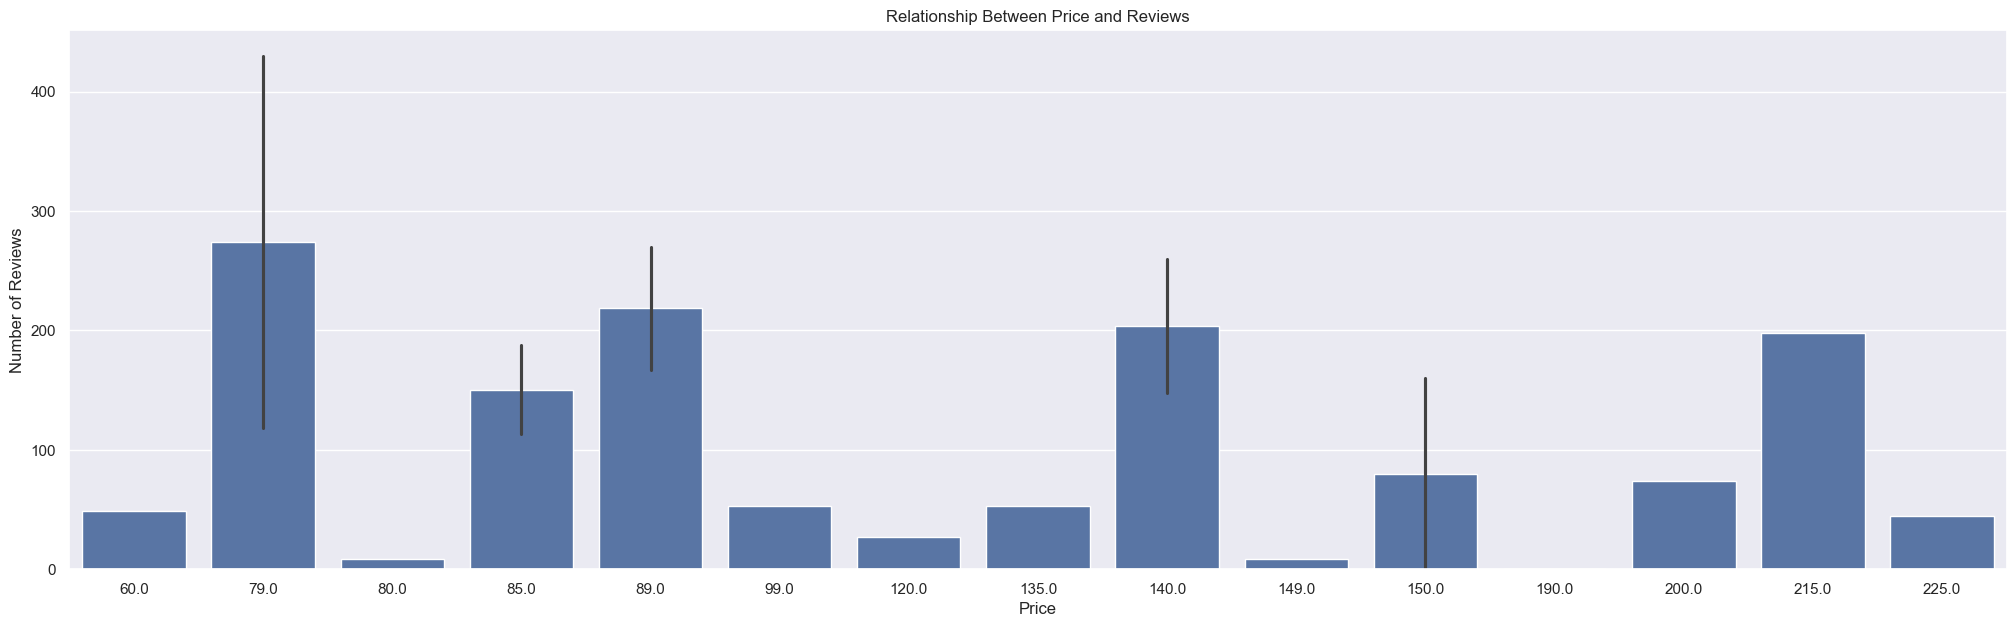

In [157]:
sns.barplot(x = "Price", y = "number_of_reviews", data = df)
sns.set(rc={'figure.figsize':(25,7)})
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.title("Relationship Between Price and Reviews")
plt.show()

Thus we can see that review is not directly affecting the customer rating.

#### How do reviews differ across boroughs?

In [167]:
borough_review = df.groupby("Proper_trim_neighbourhood_grp")["number_of_reviews"].mean().sort_values(ascending = False)
print(borough_review)

Proper_trim_neighbourhood_grp
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Name: number_of_reviews, dtype: float64


<Axes: xlabel='Proper_trim_neighbourhood_grp', ylabel='number_of_reviews'>

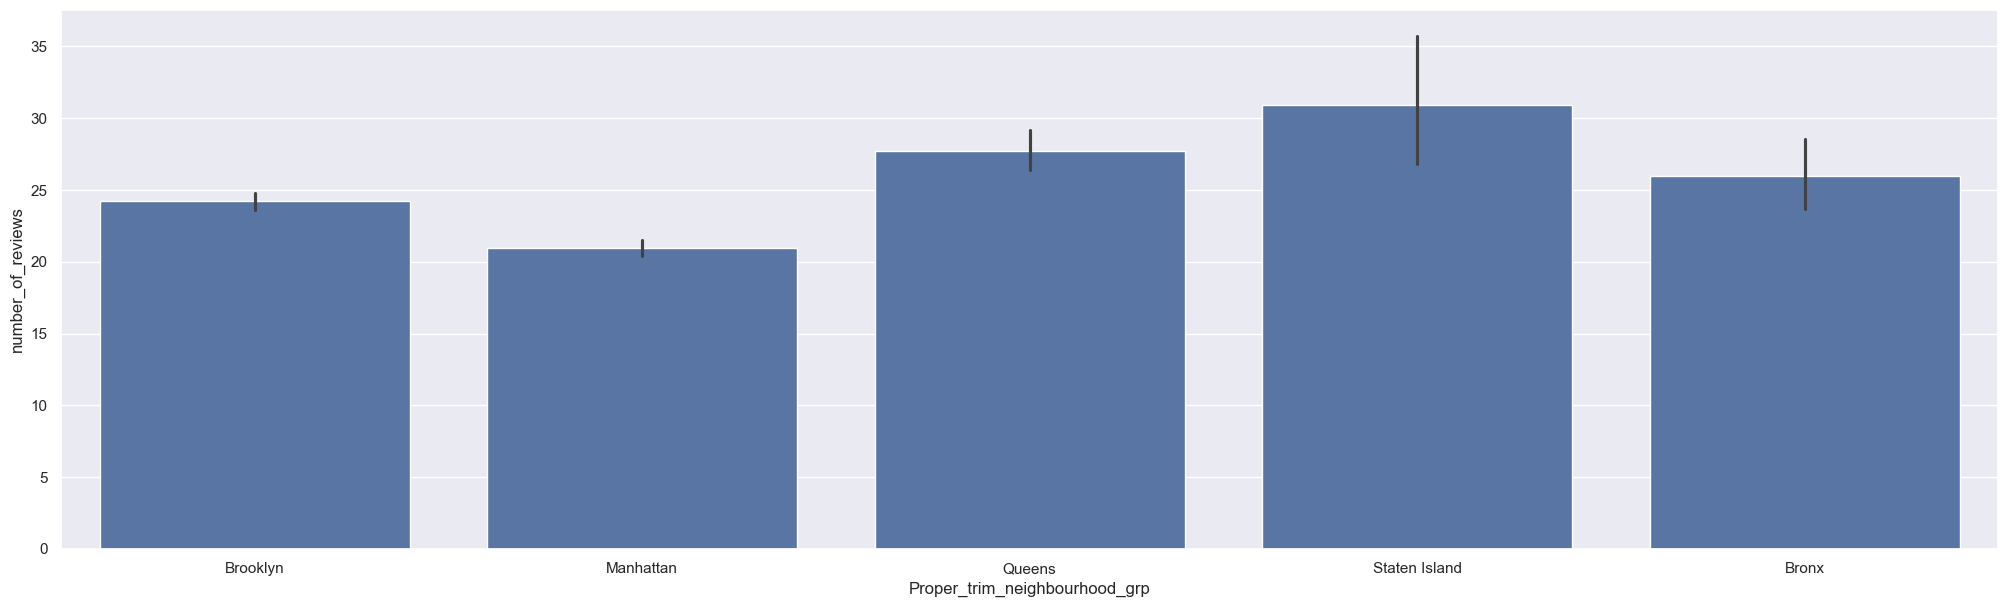

In [169]:
sns.barplot(x = "Proper_trim_neighbourhood_grp", y = "number_of_reviews", data = df)

Thus we can see that Staten Island has the most number of review that means it is attracting more customers, then Queens, Bronx, Brooklyn and Manhattan.

#### Are highly-rated listings clustered in certain areas?

In [177]:
high_rated_areas = df.groupby("Proper_trim_neighbourhood")["number_of_reviews"].mean().sort_values(ascending=False).head(10)
print(high_rated_areas)

Proper_trim_neighbourhood
Silver Lake            118.500000
East Elmhurst           81.659459
Richmondtown            79.000000
Eltingville             76.000000
Mount Eden              70.000000
Springfield Gardens     69.094118
Tompkinsville           57.142857
Huguenot                55.666667
Manhattan Beach         50.625000
Highbridge              48.814815
Name: number_of_reviews, dtype: float64


thus we can see that Silver Lake has the most review, then East Elmhurst, Richmondtown, Eltingivlle and so on.

In [184]:
high_listing_areas = df.groupby("Proper_trim_neighbourhood")["host_id"].count().sort_values(ascending=False).head(10)
print(high_listing_areas)

Proper_trim_neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell'S Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: host_id, dtype: int64


from this we can observe that the areas which has most number of listing is different than the areas which has high rating of listing.